Import some packages that will be helpful to begin with

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the datasets into dataframes using pandas

In [2]:
dftrain = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
dftest = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [3]:
display(dftrain.head())
dftrain.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

Find columns with lots of missing values and remove from dataset

In [4]:
missing = dftrain.isnull().sum()
missing = missing[missing > 400]
missing.sort_values(inplace = True)
print(missing)

FireplaceQu     690
Fence          1179
Alley          1369
MiscFeature    1406
PoolQC         1453
dtype: int64


In [5]:
c = missing.index
np.array(c)

array(['FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'],
      dtype=object)

In [6]:
dftrain = dftrain.drop(columns = c, axis = 1)
dftrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


I can see lots of 0s in dataset which wouldnt contribute the model so remvoing coloumns with lots of these values

In [7]:
zeros = dftrain.replace(0, np.nan)
zeros = zeros.isna().sum()
zeros = zeros[zeros > 300]
zeros.sort_values(inplace = True)
print(zeros)

BsmtFinSF1        467
OpenPorchSF       656
Fireplaces        690
WoodDeckSF        761
2ndFlrSF          829
BsmtFullBath      856
MasVnrArea        869
HalfBath          913
EnclosedPorch    1252
BsmtFinSF2       1293
ScreenPorch      1344
BsmtHalfBath     1378
MiscVal          1408
LowQualFinSF     1434
3SsnPorch        1436
PoolArea         1453
dtype: int64


In [8]:
c = zeros.index
np.array(c)

array(['BsmtFinSF1', 'OpenPorchSF', 'Fireplaces', 'WoodDeckSF',
       '2ndFlrSF', 'BsmtFullBath', 'MasVnrArea', 'HalfBath',
       'EnclosedPorch', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'MiscVal', 'LowQualFinSF', '3SsnPorch', 'PoolArea'], dtype=object)

In [9]:
dftrain.drop(columns = c, axis = 1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,548,TA,TA,Y,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2,460,TA,TA,Y,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2,608,TA,TA,Y,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,3,642,TA,TA,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,3,836,TA,TA,Y,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2,460,TA,TA,Y,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2,500,TA,TA,Y,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,1,252,TA,TA,Y,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,1,240,TA,TA,Y,4,2010,WD,Normal,142125


# Feature selection

Find columns with high correlation to the outcome 'Sale Price' 

<AxesSubplot:>

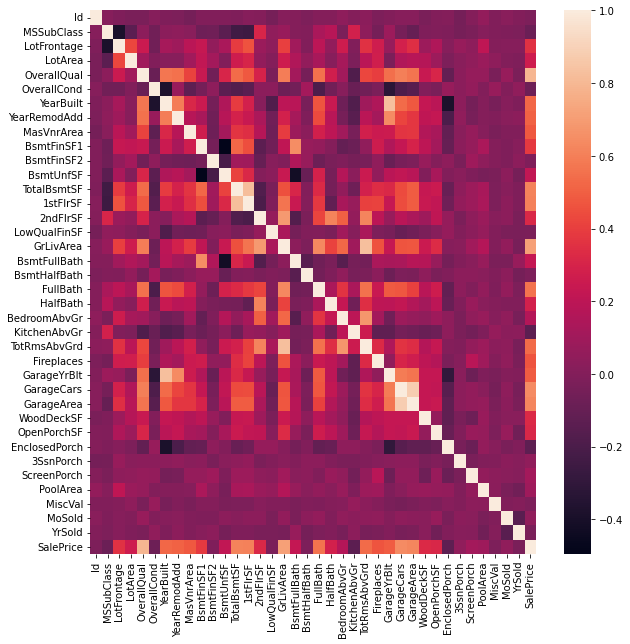

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(dftrain.corr())

In [11]:
important_num_cols = list(dftrain.corr()
                        ["SalePrice"][(dftrain.corr()["SalePrice"]>0.40) 
                        |
                        (dftrain.corr()["SalePrice"]<-0.40)].index)
important_num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

<AxesSubplot:>

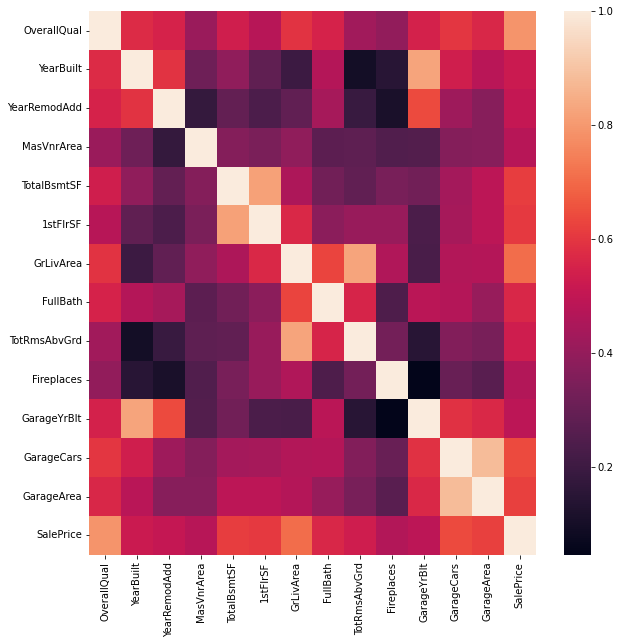

In [12]:
numcols = dftrain[dftrain.columns.intersection(important_num_cols)]
plt.figure(figsize=(10,10))
sns.heatmap(numcols.corr())

In [13]:
c = ['1stFlrSF', 'GarageCars', 'TotRmsAbvGrd', 'GarageYrBlt', 'YearRemodAdd']
numcols = numcols.drop(columns = c, axis = 1)
numcols

,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice
0,7,2003,196.0,856,1710,2,0,548,208500
1,6,1976,0.0,1262,1262,2,1,460,181500
2,7,2001,162.0,920,1786,2,1,608,223500
3,7,1915,0.0,756,1717,1,1,642,140000
4,8,2000,350.0,1145,2198,2,1,836,250000
...,...,...,...,...,...,...,...,...,...
1455,6,1999,0.0,953,1647,2,1,460,175000
1456,6,1978,119.0,1542,2073,2,2,500,210000
1457,7,1941,0.0,1152,2340,2,2,252,266500
1458,5,1950,0.0,1078,1078,1,0,240,142125


In [14]:
X = numcols.drop("SalePrice",axis=1)
y = numcols["SalePrice"]

In [15]:
X = X.fillna(0)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [17]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Linear regression

In [18]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred)

print("mae=",mae)
print("mse=",mse)
print("rmse=",rmse)
print("r2=",r2)

mae= 24730.61558066875
mse= 1498460047.9698477
rmse= 38709.94766167797
r2= 0.8046419399261292


SVM

In [20]:
from sklearn.svm import SVR

svr=SVR(C=100000)
svr.fit(X_train,y_train)
pred=svr.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred)

print("mae=",mae)
print("mse=",mse)
print("rmse=",rmse)
print("r2=",r2)

mae= 20798.77610369253
mse= 1568164812.1730068
rmse= 39600.060759713575
r2= 0.7955543519513382


In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_2d = poly.fit_transform(X_train)
X_test_2d = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_2d, y_train)
pred = lr.predict(X_test_2d)

#Getting Residuals
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test,pred)

print("mae=", mae)
print("mse=", mse)
print("rmse=", rmse)
print("r2=", r2)

mae= 22771.253676565313
mse= 1194404311.775943
rmse= 34560.15497326283
r2= 0.8442824621126568
